## Decision Tree Regression

There is an overarching concept called **CART**, which stands for __Classification and Regression Trees__. Using this concept, it is possible to create regression based on a decision tree. This can be demonstrated with the following graph:

<img src="split.png" alt="Split data points." style="width: 700px;"/>

As seen from this graph, there are $x_1$ and $x_2$ values, used for ease of demonstration. The decision tree can also be created from just a single variable. The y-value cannot be seen as it would be located in the 3<sup>rd</sup> dimension due to the nature of graphs. Using a complex mathematical concept called **Information Entropy**, the graph is split into sections of information called *leaves*. Essentially, it determines whether making a split at a certain location would provide more *information* about the dataset and uses this decision to split the dataset into groups. The final leaves present after all splits have been performed are called *terminal leaves*.

<img src="averages.png" alt="Averages of Terminal Leaves" style="width: 700px;"/>

After the splits have been made, each *terminal leaf* contains its own set of datapoints. Each *terminal leaf* is then assigned an overall value, which is the average of its datapoints' y-values.

<img src="tree.png" alt="Decision tree." style="width: 700px;"/>

The entire process of splitting the graph can be represented as a decision tree, as shown above. Using this decision tree, values can be easily predicted. By following the diagram above, a point with an $x_1$ of 50 and a $x_2$ of 200 will go along the right path twice. This will result in its predicted value being 1023.



<hr>

## Code

__Setting up the dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values # Current indexing syntax retains the matrix dataype.
y = dataset.iloc[:, 2].values

<hr>

__Fitting the Regression Model & Making a Prediction:__

In [2]:
# Fitting the Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)  
#'random_state' involves pseudo-randomness to get predicted results. Same randomness value will yield same results.
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(np.asmatrix(6.5))
y_pred

array([150000.])

<hr>

__Visual Training Results:__

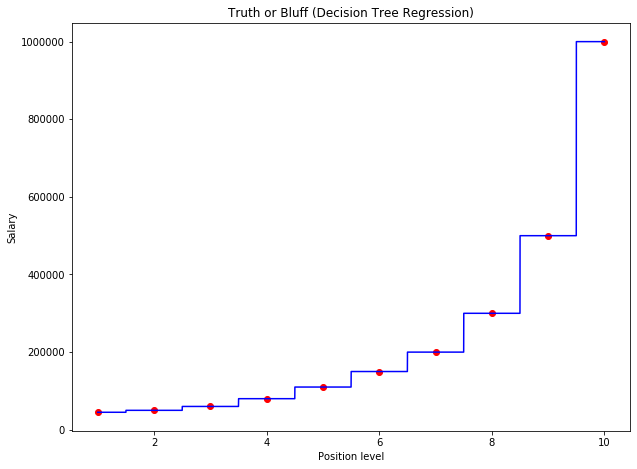

In [3]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

# Visualising the Regression results
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

__Note:__

The graph above shows why decision tree regression isn't a great model when dealing with 1-D data, or a single predictor dataset. The entire interval of values between each integer ends up containing the same value as the integer itself. That said, the model would definitely work great with datasets that contain more predictors.